# Base example

to get started:


In [1]:
import portofolio as porto

A few folders should have been created in your source directory
    1. client data
        a) accounts - where all your account information will be stored (transactions and cash)
        b) data - price and fx data will be stored and retreived from that location
        c) outputs - reporting html files will be saved there
    2. config
        a) a default config file has been created, api keys for the selected source needs to be entered

Creating a new portfolio

In [2]:
portfolio = porto.Portfolio(account='Example', currency="USD")
portfolio.reset_transactions()
portfolio.reset_cash()

In [3]:


print(portfolio.transactions)
print(portfolio.cash_history)

Empty DataFrame
Columns: [Ticker, Type, Quantity, Price, Fees, Currency]
Index: []
Series([], dtype: float64)


Now we want to add a transaction

In [4]:
from datetime import datetime

transaction = porto.Transaction(date=datetime(2022, 1, 31),
                                ticker="AAPL",
                                type="Buy",
                                quantity=10,
                                price=120.,
                                fees=5.,
                                currency="USD")

portfolio.add_transaction([transaction])


2022-02-22 22:01:00,361:ERROR:Example: Not enough funds to perform this transaction, missing 1200.0 to complete: in add_transaction


We need to have funds to perform transactions

In [5]:
portfolio.add_cash_change(date=datetime(2022, 1, 1), direction="Deposit", amount=1_000_000)

2022-02-22 22:01:00,380:INFO:cash change for Example have been added: in add_cash_change


In [6]:
portfolio.cash()

1000000

Now we can add a transaction

In [7]:
portfolio.add_transaction([transaction])

2022-02-22 22:01:00,418:INFO:Transaction - 2022-01-31 - AAPL was added to account: Example: in add


In [8]:
portfolio.positions.get('AAPL').quantities

2022-01-31    10.0
2022-02-01    10.0
2022-02-02    10.0
2022-02-03    10.0
2022-02-04    10.0
2022-02-07    10.0
2022-02-08    10.0
2022-02-09    10.0
2022-02-10    10.0
2022-02-11    10.0
2022-02-14    10.0
2022-02-15    10.0
Name: qty, dtype: float64

In [9]:
portfolio.positions

{'AAPL': AAPL - USD}

In [10]:
aapl = portfolio.positions.get('AAPL')

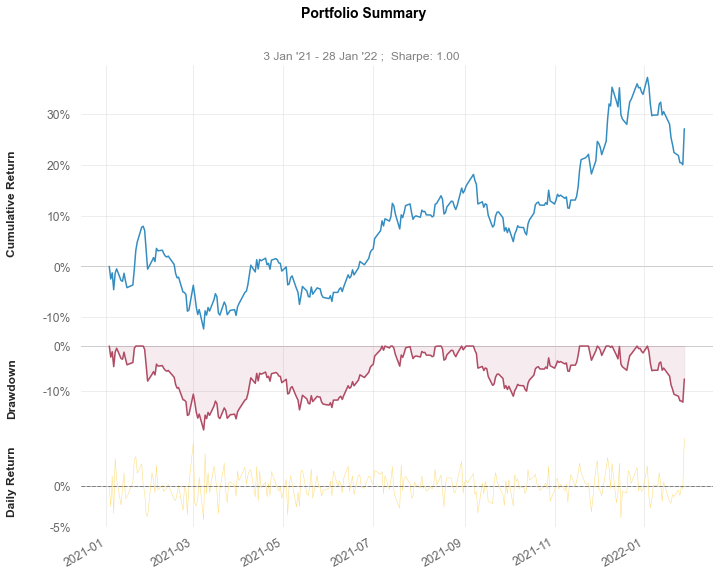

In [12]:
ret = aapl.prices.pct_change().loc[datetime(2021, 1, 1):]

import quantstats as qs

qs.plots.snapshot(ret)

2022-02-22 22:01:28,173:INFO:SRU-UN.TO: error in trx date (2022-01-17 00:00:00), NYSE market not open. open qty set to 0: in daily_pnl


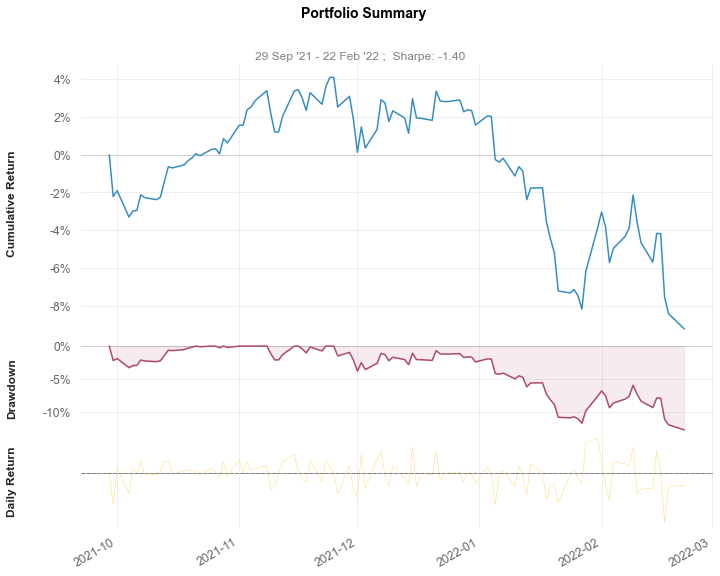

In [13]:
ptf = porto.Portfolio(account="tfsa", currency="CAD")
pnl = ptf.pct_daily_total_pnl(start_date=ptf.start_date)

qs.plots.snapshot(pnl)